In [101]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import datetime as dt
import plotly as plotly
import plotly.express as px 
import plotly.graph_objects as go



In [102]:
 #Read in the CSV set
main_data = pd.read_csv('googleplaystore.csv')
main_data.head()

,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,07-Jan-18,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,01-Aug-18,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,08-Jun-18,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [103]:
#Evaluate count of ratings
main_data.count()

Rating             9366
App               10840
Category          10840
Reviews           10840
Size              10840
Installs          10840
Type              10839
Price             10840
Content Rating    10840
Genres            10840
Last Updated      10840
Current Ver       10832
Android Ver       10838
dtype: int64

In [104]:
#drop rating with zero value
updated_df = main_data.dropna()

#Evaluate # of ratings 
updated_df.count()


Rating            9360
App               9360
Category          9360
Reviews           9360
Size              9360
Installs          9360
Type              9360
Price             9360
Content Rating    9360
Genres            9360
Last Updated      9360
Current Ver       9360
Android Ver       9360
dtype: int64

In [105]:
# Cleaned data to show columns
cleaned_df = updated_df[['Rating','App','Category','Reviews','Type','Installs','Last Updated']]
cleaned_df

,Rating,App,Category,Reviews,Type,Installs,Last Updated
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,Free,"10,000+",07-Jan-18
1,3.9,Coloring book moana,ART_AND_DESIGN,967,Free,"500,000+",15-Jan-18
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,Free,"5,000,000+",01-Aug-18
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,Free,"50,000,000+",08-Jun-18
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,Free,"100,000+",20-Jun-18
...,...,...,...,...,...,...,...
10833,4.0,FR Calculator,FAMILY,7,Free,500+,18-Jun-17
10835,4.5,Sya9a Maroc - FR,FAMILY,38,Free,"5,000+",25-Jul-17
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,Free,100+,06-Jul-18
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Free,"1,000+",19-Jan-15


In [106]:
#looking for the updated unique values
n = cleaned_df.nunique(axis=0)
n

Rating            39
App             8190
Category          33
Reviews         5990
Type               2
Installs          19
Last Updated    1299
dtype: int64

In [107]:
#State the number of rows and columns
cleaned_df.shape

(9360, 7)

In [108]:
cleaned_df = cleaned_df.drop_duplicates(subset="App")
cleaned_df

,Rating,App,Category,Reviews,Type,Installs,Last Updated
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,Free,"10,000+",07-Jan-18
1,3.9,Coloring book moana,ART_AND_DESIGN,967,Free,"500,000+",15-Jan-18
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,Free,"5,000,000+",01-Aug-18
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,Free,"50,000,000+",08-Jun-18
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,Free,"100,000+",20-Jun-18
...,...,...,...,...,...,...,...
10833,4.0,FR Calculator,FAMILY,7,Free,500+,18-Jun-17
10835,4.5,Sya9a Maroc - FR,FAMILY,38,Free,"5,000+",25-Jul-17
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,Free,100+,06-Jul-18
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Free,"1,000+",19-Jan-15


In [109]:
#Convert Install to numberic          #.loc[row_indexer,col_indexer] = value
newInstalls = []
for row in cleaned_df.Installs:
    row = row[:-1]
    newRow = row.replace(",", "")
    newInstalls.append(float(newRow))
cleaned_df.Installs = newInstalls
cleaned_df.Installs.head()

/Users/carmengrayson/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [110]:
# check the updated installs column
cleaned_df.Installs


0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10833         500.0
10835        5000.0
10836         100.0
10838        1000.0
10839    10000000.0
Name: Installs, Length: 8190, dtype: float64

In [112]:
#Processing the category column
catval_df = cleaned_df['Category'].value_counts(dropna=False)
catval_df.index

Index(['FAMILY', 'GAME', 'TOOLS', 'FINANCE', 'PRODUCTIVITY', 'LIFESTYLE',
       'PERSONALIZATION', 'MEDICAL', 'BUSINESS', 'PHOTOGRAPHY', 'SPORTS',
       'COMMUNICATION', 'HEALTH_AND_FITNESS', 'NEWS_AND_MAGAZINES', 'SOCIAL',
       'TRAVEL_AND_LOCAL', 'SHOPPING', 'BOOKS_AND_REFERENCE', 'VIDEO_PLAYERS',
       'DATING', 'EDUCATION', 'MAPS_AND_NAVIGATION', 'ENTERTAINMENT',
       'FOOD_AND_DRINK', 'AUTO_AND_VEHICLES', 'WEATHER', 'LIBRARIES_AND_DEMO',
       'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'COMICS', 'PARENTING', 'EVENTS',
       'BEAUTY'],
      dtype='object')

In [113]:
# plt.pie(catval_df, labels=labels,
#         autopct="%1.1f%%", shadow=True, startangle=140, figsize = (12,12))

In [117]:
cleaned_df.dtypes

Rating          float64
App              object
Category         object
Reviews           int64
Type             object
Installs        float64
Last Updated     object
dtype: object

In [118]:
#cleaned_df=pd.to_datetime(['Last Updated'], format='%d-%m-%Y ')
#cleand_df

#cleaned_df['date'] = cleaned_df['Last Updated'].dt.strftime('%m/%d/%Y')
updated_df['Last Updated'] = pd.to_datetime(updated_df['Last Updated'])
updated_df


<ipython-input-118-3a6841b79238>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rating,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,3.9,Coloring book moana,ART_AND_DESIGN,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,4.0,FR Calculator,FAMILY,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10835,4.5,Sya9a Maroc - FR,FAMILY,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06,1,4.1 and up
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [119]:
cleaned_df['Last Updated'] = pd.to_datetime(cleaned_df['Last Updated'])
cleaned_df

<ipython-input-119-6652002cde9e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rating,App,Category,Reviews,Type,Installs,Last Updated
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,Free,10000.0,2018-01-07
1,3.9,Coloring book moana,ART_AND_DESIGN,967,Free,500000.0,2018-01-15
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,Free,5000000.0,2018-08-01
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,Free,50000000.0,2018-06-08
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,Free,100000.0,2018-06-20
...,...,...,...,...,...,...,...
10833,4.0,FR Calculator,FAMILY,7,Free,500.0,2017-06-18
10835,4.5,Sya9a Maroc - FR,FAMILY,38,Free,5000.0,2017-07-25
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,Free,100.0,2018-07-06
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Free,1000.0,2015-01-19


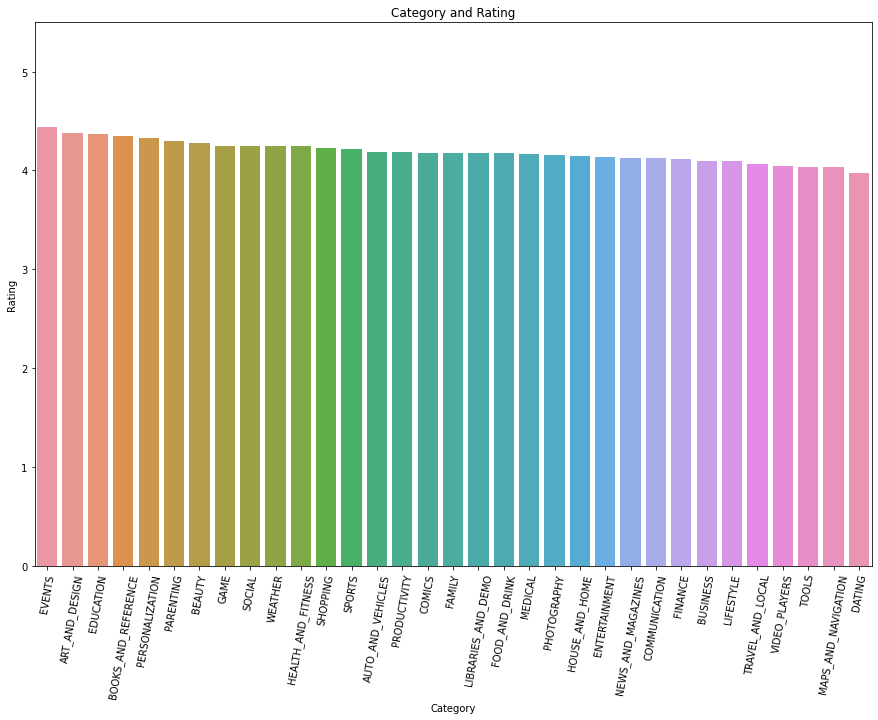

In [120]:
#bar chart
category_list = list(cleaned_df['Category'].unique())
category_Rating = []
for i in category_list:
    x = cleaned_df[cleaned_df['Category'] == i]
    if(len(x)!=0):
        Rating = sum(x.Rating)/len(x)
        category_Rating.append(Rating)
    else:
        Rating = sum(x.Category)
        category_Rating.append(Rating)
        
#sorting
data_category_Rating= pd.DataFrame({'Category': category_list,'Rating':category_Rating})
new_index = (data_category_Rating['Rating'].sort_values(ascending=False)).index.values
sorted_data =data_category_Rating.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['Category'], y=sorted_data['Rating'])
plt.xticks(rotation=80)
plt.ylim(0,5.5)
plt.xlabel("Category")
plt.ylabel("Rating")
plt.title("Category and Rating")
plt.show()


In [121]:
# # Number of INSTALLS VS. RATINGS   
# install_df = pd.DataFrame(cleaned_df,columns =['Installs','Rating'])
# plt.plot(install_df['Installs'], install_df['Rating'], color='green', marker='o')
# plt.title('Rating Vs Number of Installs', fontsize=14)
# plt.xlabel('Installs', fontsize=14)
# plt.ylabel('Rating', fontsize=14)
# plt.grid(True)
# plt.show()

In [122]:

# # This dataframe has 244 lines, but 4 distinct values for `day`
# fig = px.pie(cleaned_df, values='Rating', names='Category')
# fig.show()

In [123]:
# pie_chart = install_df['Category'].unique()
# print pie_chart.sort()
# pie_chart

In [124]:
# category_list = list(cleaned_df['Category'].unique())
category_review = []
for i in category_list:
    x = cleaned_df[cleaned_df['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
plt.bar(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.yticks()
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1080x720 with 0 Axes>

In [146]:
# NUMBER of REVIEWS VS. RATINGS

# review_df =cleaned_df[['Reviews','Rating']]
# review_df


,Reviews,Rating
0,159,4.1
1,967,3.9
2,87510,4.7
3,215644,4.5
4,967,4.3
...,...,...
10833,7,4.0
10835,38,4.5
10836,4,5.0
10838,114,4.5


In [126]:
# # Updated versions vs Ratings ************************** HOW DO WE QUANTIFY THE DATE???
upver_df =cleaned_df[['Last Updated','Rating']]
upver_df


,Last Updated,Rating
0,2018-01-07,4.1
1,2018-01-15,3.9
2,2018-08-01,4.7
3,2018-06-08,4.5
4,2018-06-20,4.3
...,...,...
10833,2017-06-18,4.0
10835,2017-07-25,4.5
10836,2018-07-06,5.0
10838,2015-01-19,4.5


In [127]:
cleaned_df.corr()

,Rating,Reviews,Installs
Rating,1.000000,0.055076,0.040131
Reviews,0.055076,1.000000,0.624050
Installs,0.040131,0.624050,1.000000


In [128]:
 cleaned_df.corr() 

,Rating,Reviews,Installs
Rating,1.000000,0.055076,0.040131
Reviews,0.055076,1.000000,0.624050
Installs,0.040131,0.624050,1.000000


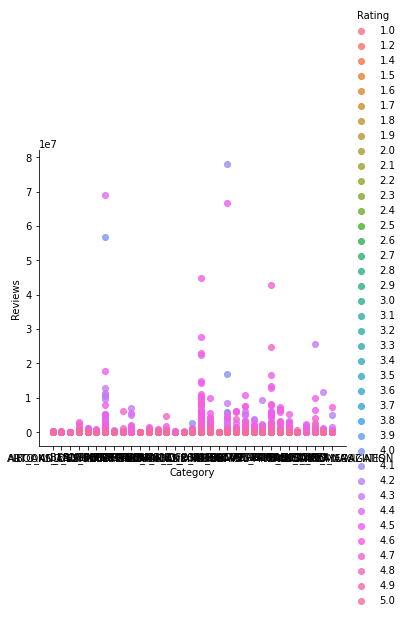

In [139]:
#Scatter plot with Ratings Reviews and Installs

# Plot using Seaborn
sns.lmplot(x='Category', y='Reviews', data=cleaned_df,
           fit_reg=False, 
           hue='Rating')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0,None)



In [145]:
clean_df

,Rating,App,Category,Reviews,Type,Installs,Last Updated
0,4.1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,159,Free,10000.0,2018-01-07
1,3.9,Coloring book moana,ART_AND_DESIGN,967,Free,500000.0,2018-01-15
2,4.7,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,87510,Free,5000000.0,2018-08-01
3,4.5,Sketch - Draw & Paint,ART_AND_DESIGN,215644,Free,50000000.0,2018-06-08
4,4.3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,967,Free,100000.0,2018-06-20
...,...,...,...,...,...,...,...
10833,4.0,FR Calculator,FAMILY,7,Free,500.0,2017-06-18
10835,4.5,Sya9a Maroc - FR,FAMILY,38,Free,5000.0,2017-07-25
10836,5.0,Fr. Mike Schmitz Audio Teachings,FAMILY,4,Free,100.0,2018-07-06
10838,4.5,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,114,Free,1000.0,2015-01-19


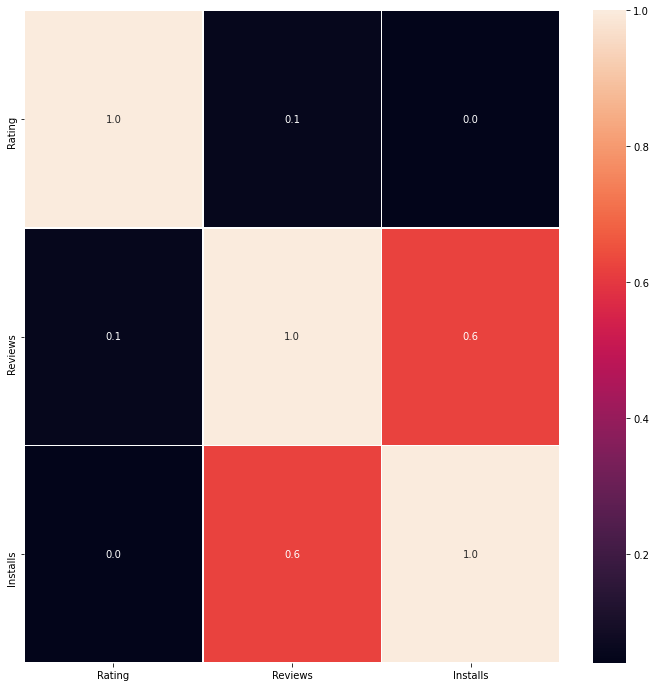

In [130]:
#correlation map
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cleaned_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()